<a href="https://colab.research.google.com/github/AlvinChiew/DeepLearning/blob/main/TF2_0_ANN_Regression_NonLinearCosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Data

In [10]:
N = 1000
X = np.random.random((N,2))     # randomly generate 2D data for N samples - x_1 and x_2
X = X * 6 - 3       # distribute between (-3 , +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])     # y = cos(2x_1) + cos(3x_2)

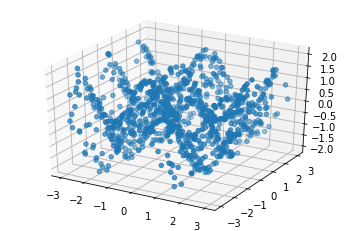

In [17]:
### plot data ###

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')      # 111 = #row #col idx of subplot
ax.scatter(X[:,0],X[:,1], Y)

# Build Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),       # 128 hidden layers; 2 features
    tf.keras.layers.Dense(1)        # Output is 1D
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(0.01),      # set learning rate to 0.01 - trial and error
    loss="mse"
)

log = model.fit(X, Y, epochs=100)       # 100 - trial and error

Epoch 1/100
32/32 [==============================] - 0s 955us/step - loss: 0.9273
Epoch 2/100
32/32 [==============================] - 0s 846us/step - loss: 0.8786
Epoch 3/100
32/32 [==============================] - 0s 852us/step - loss: 0.8576
Epoch 4/100
32/32 [==============================] - 0s 918us/step - loss: 0.8409
Epoch 5/100
32/32 [==============================] - 0s 952us/step - loss: 0.8805
Epoch 6/100
32/32 [==============================] - 0s 884us/step - loss: 0.8168
Epoch 7/100
32/32 [==============================] - 0s 979us/step - loss: 0.7252
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6713
Epoch 9/100
32/32 [==============================] - 0s 916us/step - loss: 0.6130
Epoch 10/100
32/32 [==============================] - 0s 931us/step - loss: 0.5798
Epoch 11/100
32/32 [==============================] - 0s 901us/step - loss: 0.5693
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5404
Epoch 13/100
32/3

# Model Evaluation

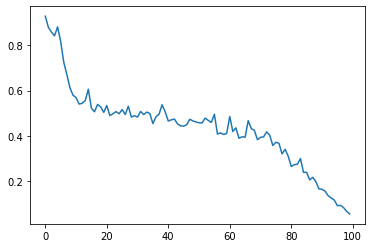

In [21]:
plt.plot(log.history['loss'],label='loss')

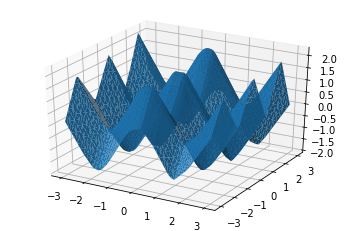

In [26]:
# Surface plot
line = np.linspace(-3,3,50)     

def plot_predition(mesh_line):
    xx_1, xx_2 = np.meshgrid(line,line)        # create mesh grid of 50 evenly spaced points between -3 and +3 for x_1 and x_2 for plotting prediction
    Xgrid = np.vstack((xx_1.flatten(),xx_2.flatten())).T    # stacks arrays of x_1 and x_2 vertically then transpose to generate N x 2 input
    y_predicted = model.predict(Xgrid).flatten()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1], y_predicted, linewidth=0.2, antialiased=True)
    plt.show()

plot_predition(line)

# Extrapolation (Not Feasible)

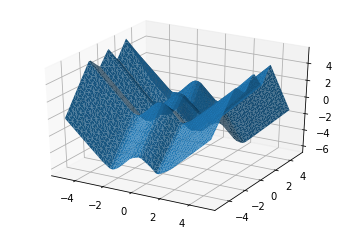

In [27]:
# Extend range (-3,+3) to (-5,+5)
line = np.linspace(-5,5,50)   
plot_predition(line)

# Try periodic activation function, e.g. sigmoid in modeling for extrapolation